In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [2]:
dataset=pd.read_csv("./input/IRIS.csv")

print(dataset['species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [3]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


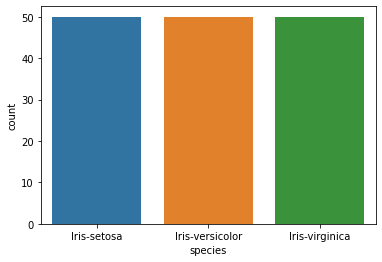

In [4]:
sns.countplot(x='species',data=dataset)
species={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
dataset=dataset.replace({'species':species})
plt.savefig('train_data_species.png')

In [5]:
dataset.corr()['species']

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
species         1.000000
Name: species, dtype: float64

In [6]:
Y = np.array(dataset['petal_width'])
Y = Y.reshape(-1, 1)
X = np.array(dataset['petal_length'])
X = X.reshape(-1, 1)

In [7]:
species={1:'Iris-setosa',2:'Iris-versicolor',3:'Iris-virginica'}
dataset=dataset.replace({'species':species})
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#We use single linkage in our model and distance between data will be calculated using euclidean distange method.
HCA=AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage ="ward") 
HCA.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
#linked1 = linkage(X, 'single')
#linked2 = linkage(Y, 'single')

In [10]:
species = list(dict.fromkeys(dataset['species']))

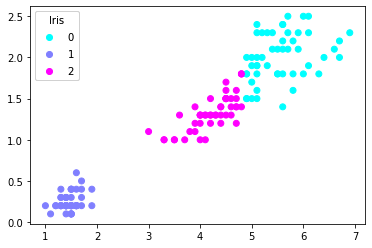

In [11]:
fig, ax = plt.subplots()

scatter = ax.scatter(dataset['petal_length'],dataset['petal_width'],c=HCA.labels_, cmap='cool')

legend = ax.legend(*scatter.legend_elements(), loc="upper left", title="Iris")
#legend = ax.legend([0, 1, 2], , loc="upper left", title="Iris")

ax.add_artist(legend)
